In [93]:
# Import data and necessary elements
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.datasets import fetch_lfw_people # dataset of the faces, 
faces = fetch_lfw_people(min_faces_per_person=60)

# Import other necessary elements
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import RandomizedPCA
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

# Function to plot the images:
def plot_images(data):
    fig, ax = plotter.subplots(3, 5)
    for i, axi in enumerate(ax.flat):
        axi.imshow(data[i].reshape(62,47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1], color = "black")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=2)

# Make pipeline

In [96]:
# PCA and SVC
pca = RandomizedPCA(n_components= 50, random_state=2, whiten=True) # whiten = True to normalize the data

svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline
model = make_pipeline(pca, svc)


# Gridsearch

In [125]:
parameters = {'svc__C' : [1, 5, 10, 50], 
              'svc__gamma' : [0.0001, 0.0005, 0.001, 0.005]}

clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

new_model = clf.best_estimator_
print(clf.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


In [126]:
new_labels = new_model.predict(X_test)

print(new_labels)

[3 1 1 3 7 3 2 5 6 5 4 1 1 7 3 1 3 3 1 1 3 7 3 0 3 4 1 1 2 7 3 2 5 2 2 0 0
 7 0 4 1 5 5 2 3 1 2 7 3 6 0 3 4 3 3 4 7 1 3 3 1 1 0 0 7 3 3 0 7 7 3 0 1 3
 6 3 3 3 4 3 3 2 1 3 4 3 3 1 5 7 3 3 7 7 7 3 3 3 5 5 2 6 3 1 1 1 4 0 3 3 4
 3 1 3 4 1 3 3 1 1 3 1 3 3 3 4 1 1 7 1 3 3 3 7 3 1 7 5 3 3 4 3 1 2 1 3 7 4
 3 7 0 7 3 1 3 5 3 3 3 3 3 2 4 3 7 3 3 6 3 3 3 1 0 1 7 4 3 1 0 3 1 5 0 4 3
 3 2 3 5 0 1 6 3 3 1 2 4 1 3 3 4 3 3 3 4 1 4 1 4 3 6 3 3 3 7 4 7 5 2 0 3 2
 3 6 7 7 3 7 0 1 2 0 1 4 0 3 3 1 3 7 1 1 2 2 1 2 3 3 1 5 3 3 3 0 4 5 3 3 6
 1 3 1 2 3 3 6 0 6 3 7 3 3 7 4 0 5 3 3 3 0 5 1 3 3 4 7 7 1 3 3 4 2 7 3 1 3
 4 3 4 7 5 3 3 3 1 3 7 4 3 3 1 3 1 1 3 7 2 7 3 4 0 3 5 7 2 1 1 3 5 7 2 3 3
 1 3 2 7]


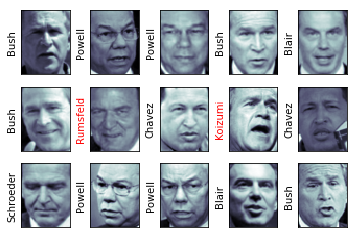

In [127]:
def plot_results(data, y_test):
    fig, ax = plotter.subplots(3, 5)
    for i, axi in enumerate(ax.flat):
        axi.imshow(data[i].reshape(62,47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        if y_test[i] == new_labels[i]:
            axi.set_ylabel(faces.target_names[new_labels[i]].split()[-1], color = "black")
        else:
            axi.set_ylabel(faces.target_names[new_labels[i]].split()[-1], color = "red")
plot_results(X_test, y_test)
